# Artificial Neural Network

# Part 1 - Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [4]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

In [5]:
X=pd.concat([X,geography,gender],axis=1)


## Drop Unnecessary columns

In [6]:
X=X.drop(['Geography','Gender'],axis=1)

In [7]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Perform Hyperparameter Optimization

In [9]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

from sklearn.preprocessing import StandardScaler

In [10]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))

    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid' )) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [11]:
layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [12]:
grid_result = grid.fit(X_train, y_train)

In [13]:
[grid_result.best_score_,grid_result.best_params_]

[0.8573750019073486,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 30,
  'layers': [45, 30, 15]}]

In [14]:
pred_y = grid.predict(X_test)

In [15]:
y_pred = (pred_y > 0.5)

In [16]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [18]:
cm

array([[1533,   62],
       [ 208,  197]])

In [19]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [20]:
score

0.865

# Part 2 - Now let's make the ANN!

In [21]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [22]:
#Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_normal',activation='relu',input_dim = 11))
classifier.add(Dropout(0.3))
# Adding the second hidden layer
classifier.add(Dense(units = 20, kernel_initializer = 'he_normal',activation='relu'))
classifier.add(Dropout(0.4))
# Adding the Third hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'he_normal',activation='relu'))
classifier.add(Dropout(0.2))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [23]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 0.6274 - accuracy: 0.7496 - val_loss: 0.4844 - val_accuracy: 0.7963
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.5154 - accuracy: 0.7890 - val_loss: 0.4753 - val_accuracy: 0.7959
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4847 - accuracy: 0.7925 - val_loss: 0.4628 - val_accuracy: 0.7963
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4858 - accuracy: 0.7964 - val_loss: 0.4673 - val_accuracy: 0.7970
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4723 - accuracy: 0.7957 - val_loss: 0.4546 - val_accuracy: 0.7974
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4594 - accuracy: 0.7966 - val_loss: 0.4477 - val_accuracy: 0.7982
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4645 - accuracy: 0.7979 - val_loss: 0.4485 - val_accuracy: 0.7997

In [25]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


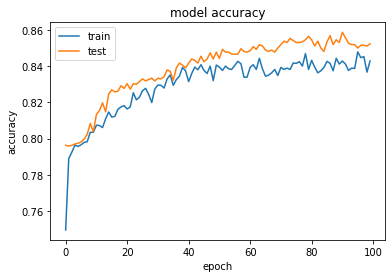

In [26]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

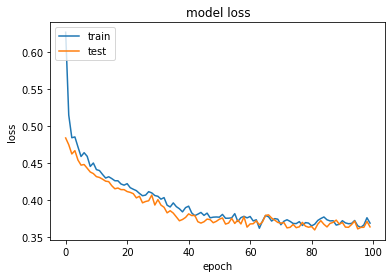

In [27]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

In [28]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1514,   81],
       [ 199,  206]])

In [30]:
#Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.86